# Numerical solution of second order ODEs: Initial value problem

In this notebook, we develop a code to solve second order ordinary differential equations that are initial value problems.  We assume that the equations are of the form:
\begin{align*}
\frac{d^2y}{dx^2} &= f\left(\frac{dy}{dx}, y, x\right)
\end{align*}
with the initial conditions
\begin{align*}
y(a) &= y_a
\\
\frac{dy(a)}{dx} &= y_a'
.
\end{align*}

The first step is to convert this second order differential equation into a set of two couple first order differential equations by defining two new functions $y_0(x)=y(x)$, which is equal to the original function, and $y_1(x)=y'(x)$, which is equal to the derivative of the original function.  With this transformation, we find the equations:
\begin{align*}
\frac{dy_0}{dx} &= y_1
\\
\frac{dy_1}{dx} &= f(y_1, y_0, x)
\end{align*}
with the initial conditions $y_0(a)=y_a$ and $y_1(a)=y_a'$.

Note that these equations are a special case of the more general form of two coupled first order differential equations:
\begin{align*}
\frac{dy_0}{dx} &= f_0(y_0, y_1, x)
\\
\frac{dy_1}{dx} &= f_1(y_0, y_1, x)
\end{align*}
where in our case $f_0(y_0, y_1, x)=y_1$ and $f_1(y_0, y_1, x)=f(y_1, y_0, x)$.  So if we can solve these more general equations, we can solve the second order initial value problem.

## Euler method for solving a system of first order ODEs

Here we present the explicit Euler method for solving a system of two first order differential equations.  This method is very similar to the one we used for solving a single first order differential equation and is based on the finite difference approximation of the derivative:
\begin{align*}
\frac{dy}{dx} \approx \frac{y(x+\Delta x)-y(x)}{\Delta x}
.
\end{align*}
This expression is only approximate, but the approximation becomes more accurate as $\Delta x$ becomes smaller and smaller.
If we substitute this approximation for $dy_0/dx$ and $dy_1/dx$ in the differential equation, we find the recursion relations:
\begin{align*}
y_0(x+\Delta x) \approx y_0(x) + f_0(y_0(x), y_1(x), x) \Delta x
\\
y_1(x+\Delta x) \approx y_1(x) + f_1(y_0(x), y_1(x), x) \Delta x
.
\end{align*}
These relations allow us to "march forward" and compute the value of the functions $y_0$ and $y_1$ given their values at a previous value of $x$.  The algorithm is implemented below in the function `solve_ode`:


In [57]:
def solve_ode(derivs, y0_a, y1_a, a, dx, nsteps):
# This function solves a set of two first order differential equations.
#
# The first argument derivs is a function that will return the values of the derivatives
# of y0 and y1, given the values of y0, y1, and x.  The argument y0_a is the value of 
# y0 at x=a.  The argument y1_a is the value of y1 at x=a.  The argument a is the initial
# value of x.  The argument dx is the step size, and the argument nsteps is the number 
# steps that will be taken in the function.

    xold = a
    y0old = y0_a   # initial value of y0: y0(a)
    y1old = y1_a   # initial value of y1: y1(a)
    
    x_data = [a]
    y0_data = [y0old]
    y1_data = [y1old]

    # xold = x
    # y0old = y0(x)
    # y1old = y1(x)
    for step in range(nsteps):
        # dy0dx = f0(y0(x), y1(x), x)
        # dy1dx = f1(y0(x), y1(x), x)
        dy0dx, dy1dx = derivs([y0old, y1old], xold)
        xnew = xold + dx            # xnew = x + dx
        y0new = y0old + dy0dx*dx    # y0new = y0(x+dx)
        y1new = y1old + dy1dx*dx    # y1new = y1(x+dx)

        x_data.append(xnew)
        y0_data.append(y0new)
        y1_data.append(y1new)
        
        xold = xnew
        y0old = y0new
        y1old = y1new
    
    return x_data, y0_data, y1_data

## Example: Simple harmonic oscillator

We will test this method against the 
\begin{align*}
\frac{d^2y}{dx^2} + y &= 0
\end{align*}
with the initial conditions $y(0)=1$ and $y'(0)=0$.  Note that
the analytical solution of this equation is $y(x)=\cos x$.


Defining $y_0(x)=y(0)$ and $y_1(x)=y'(x)$, this differential equation can be converted to the form
\begin{align*}
\frac{dy_0}{dx} &= y_1
\\
\frac{dy_1}{dx} &= -y_0
\end{align*}
where $y_0(0)=1$ and $y_1(0)=0$.  Below we solve this equation numerically and compare it with the analytical solution.


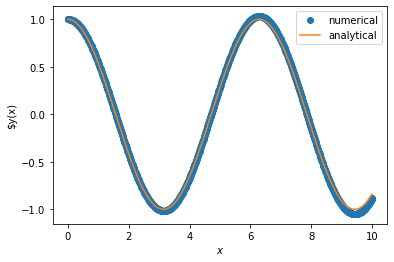

In [112]:
import pylab as plt
import numpy as np

t0 = 0.0
dt = 0.01
nsteps = 1000
y0 = 1.0
y1 = 0.0

def F(y, x):
    
    y0, y1 = y
    
    f = []
    f.append( y1)
    f.append(-y0)
    return f

x_data, y0_data, y1_data = solve_ode(F, y0, y1, t0, dt, nsteps)

plt.plot(x_data, y0_data, 'o', label='numerical')
plt.plot(x_data, [np.cos(x) for x in x_data], label='analytical')
plt.xlabel('$x$')
plt.ylabel('$y(x)')
plt.legend()
plt.show()


## Example: Pendulum

As an example, we consider the equation of motion for a pendulum of mass $m$ that is attached to a fixed point with a string of length $l$.  In addition, we assume that a drag force acts on the mass, which has a magnitude $\mu v$, where $v$ is its speed.  The differential equation is given by
\begin{align*}
m l \frac{d^2\theta}{dt^2}
+ \mu l \frac{d\theta}{dt}
+ mg \sin\theta &= 0
.
\end{align*}
This equation needs to be supplemented by a set of two initial conditions which specify the values of $\theta(0)$ and $\theta'(0)$.

In this case, we choose the define the functions $y_0(x)=\theta(t)$ and $y_1(x)=\theta'(t)$, so the first order differential equations are
\begin{align*}
\frac{dy_0}{dx} &= y_1(x)
\\
\frac{dy_1}{dx} &= -\frac{\mu}{m}y_1(x) - \frac{g}{l}\sin(y_0(x))
\end{align*}
with the corresponding initial conditions $y_0(0)=\theta(0)$ and $y_1(0)=\theta'(0)$.  Below, we solve this equation numerically.

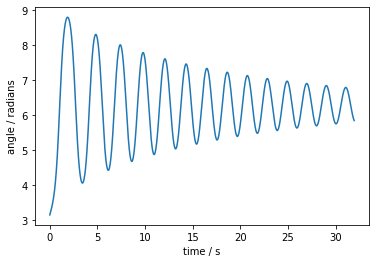

In [121]:
import numpy as np
import pylab as plt


# defining the pendulum system
l = 1.0    # length of string / m
mu = 1.0e-1   # drag factor / N s m^{-1}
m = 1.0    # mass / kg
g = 9.81   # acceleration due to gravity / m s^{-2}

# initial conditions
theta0 = np.pi*1.0
theta1 = 1.0


def dydx(y, x):
    
    y0, y1 = y
    
    f = []
    f.append(y1)
    f.append(-y1*mu/m-np.sin(y0)*g/l) 
#    f.append(-y0)
    
    return f




t0 = 0.0
dt = 0.001 * np.sqrt(l/g)
nsteps = 100000
x_data, y0_data, y1_data = solve_ode(dydx, theta0, theta1, t0, dt, nsteps)



plt.plot(x_data, y0_data)
plt.ylabel('angle / radians')
plt.xlabel('time / s')
plt.show()

### Animation

Below is a code that animates the above results.  Note that it may take a bit of time for the notebook to create the movie, so be patient please!  Also, you can try to play around with the system by changing the initial conditions.

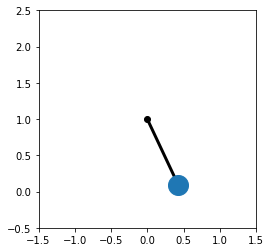

In [123]:
from matplotlib import animation, rc
from IPython.display import HTML

l = 1.0

x_data = x_data[::10]
y0_data = y0_data[::10]  


frames = len(x_data)
frames = min(len(x_data), 10000)

fig, ax = plt.subplots()
plt.ioff()

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-0.5, 2.5])
ax.set_aspect(aspect=1)

point, = ax.plot([], [], 'o', color='black')

string, = ax.plot([], [], lw='3', color='black')
mass, = ax.plot([], [], 'o', ms=20)

objs = [point, string, mass]


def init():
    for obj in objs:
        obj.set_data([], [])
    point.set_data([0.0], [l])    
    return objs


def animate(i):

    t = x_data[i]
    theta = y0_data[i]

    mass.set_data([-l*np.sin(theta)], [l-l*np.cos(theta)])
    string.set_data([0.0, -l*np.sin(theta)], [l, l-l*np.cos(theta)])

    
    return objs

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=20, blit=True)

HTML(anim.to_html5_video())